# QMSolver: Harmonic Oscillator Validation

This notebook validates `FDSolver` accuracy by solving the harmonic oscillator potential and comparing to analytical solutions.

In [1]:
import numpy as np
from scipy import constants

from qmsolver.tise import FDSolver
from qmsolver.potentials import HarmonicOscillatorPotential

In [2]:
omega = 1e14  # Angular frequency (rad/s)
x_min_m = -10e-9  # Spatial domain in meters
x_max_m = 10e-9

print("Physical parameters:")
print(f"Angular frequency (ω): {omega:.0e} rad/s")
print(f"Spatial domain: [{x_min_m:.1e}, {x_max_m:.1e}] m")

Physical parameters:
Angular frequency (ω): 1e+14 rad/s
Spatial domain: [-1.0e-08, 1.0e-08] m


****************************************

-> 5 lowest energy states:

      🔒   E(0)  = -4.50196333726989028496e-19  (bound)
      🔒   E(1)  = -4.39650644031640262713e-19  (bound)
      🔒   E(2)  = -4.29104982817529141676e-19  (bound)
      🔒   E(3)  = -4.18559350084793369377e-19  (bound)
      🔒   E(4)  = -4.08013745833557216444e-19  (bound)

****************************************


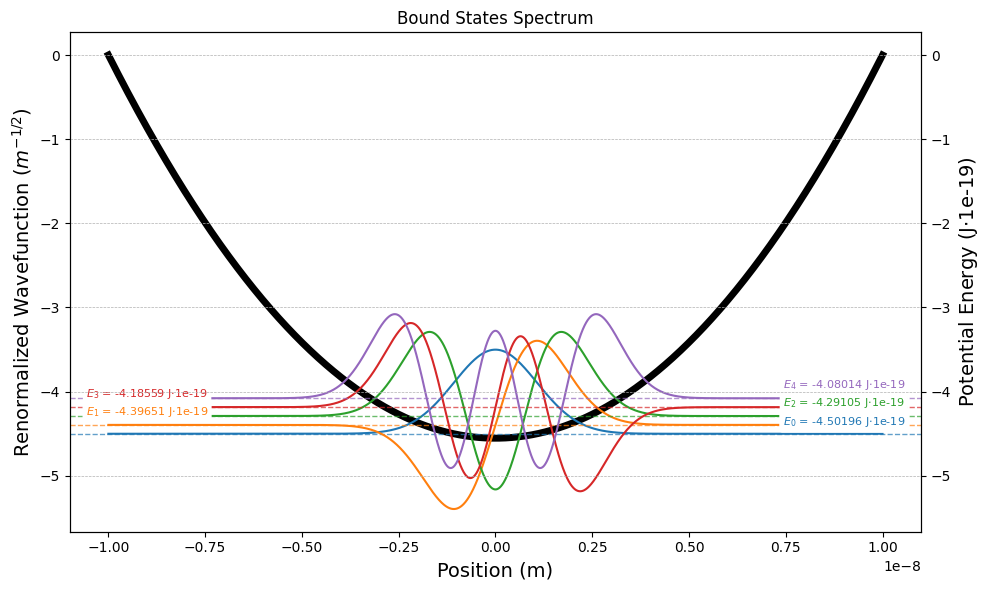

In [3]:
solver = FDSolver(steps=4_000, x_min=x_min_m, x_max=x_max_m, n_lowest=5)

# Set physical constants in SI units
solver.h_bar = constants.hbar  # Reduced Planck's constant in J⋅s
solver.m = constants.m_e  # Electron mass in kg

potential = HarmonicOscillatorPotential(
    x_grid=solver.x_grid,
    spring_constant=solver.m * omega**2,
    grid_active_range=1,  # Active over entire grid
)
solver.potential_generator = potential

solver.solve()
solver.output()
solver.plot(is_dimensionless=False, scale=1e19, energy_units="J")

# Analytical Harmonic Oscillator Energies

The analytical energies for the harmonic oscillator are given by:
$$E_n = \hbar \omega \left(n + \frac{1}{2}\right)$$

where:
- $n = 0, 1, 2, \dots$ (quantum number)
- $\omega$ is the angular frequency
- $\hbar$ is the reduced Planck constant

In [4]:
E_lowest_ev = np.array(solver.E_lowest) / constants.e
print("\nEnergies in electron volts:")
errors = []
for i, energy in enumerate(E_lowest_ev):
    analytical_energy = (constants.hbar * omega * (i + 0.5)) / constants.e
    renormalized_energy = (
        energy + np.abs(np.min(solver.potential)) / constants.e
    )
    error = (
        100 * abs(renormalized_energy - analytical_energy) / analytical_energy
    )
    errors.append(error)
    print(
        f"E({i}) = {renormalized_energy:.8f} eV | E_HO({i}): {analytical_energy:.8f} eV | Error: {error:.8f} %"
    )

print(f"\nAverage error: {np.mean(errors):.8f} %")


Energies in electron volts:
E(0) = 0.03291038 eV | E_HO(0): 0.03291060 eV | Error: 0.00067518 %
E(1) = 0.09873139 eV | E_HO(1): 0.09873179 eV | Error: 0.00040511 %
E(2) = 0.16455223 eV | E_HO(2): 0.16455299 eV | Error: 0.00045912 %
E(3) = 0.23037290 eV | E_HO(3): 0.23037418 eV | Error: 0.00055944 %
E(4) = 0.29619338 eV | E_HO(4): 0.29619538 eV | Error: 0.00067518 %

Average error: 0.00055481 %


# Conclusion

Based on the comparison of the `FDSolver` results with the analytical harmonic oscillator solutions, the numerical method demonstrates excellent accuracy for this potential. In this case, the numerical results match the expected analytical values with an error of less than 0.001% using a 4,000-step grid resolution.

The accuracy in this case is much higher than the infinite square well limit validation because the harmonic oscillator potential definition does not approximate an ideal physical system (unlike the very deep finite square well, which was a limit approximation). In the lowest energy range of the harmonic oscillator, where boundary effects are almost non-existent, the numerical description is exceptionally accurate.